In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,ZeroPadding2D
from keras.utils import np_utils
np.random.seed(1000)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Loading Data

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # resizing
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [18]:
#Dimension of the MNIST dataset
print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))

((60000, 28, 28, 1), (60000,))
((10000, 28, 28, 1), (10000,))


In [17]:
number_of_classes = 10 #no.of classes in the dataset

Y_train = np_utils.to_categorical(y_train, number_of_classes) #One Hot Encoding Labels from Train and Test Dataset
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [26]:
#Alexnet Architecture
def AlexnetModel():
    alex_model = Sequential()
    alex_model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear",input_shape=X_train.shape[1:]))
    alex_model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu'))
    alex_model.add(BatchNormalization())
    alex_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    alex_model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
    alex_model.add(BatchNormalization())
    alex_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    alex_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    alex_model.add(BatchNormalization())
    alex_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    alex_model.add(BatchNormalization())
    alex_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    alex_model.add(BatchNormalization())
    alex_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    alex_model.add(Flatten())
    alex_model.add(Dense(4096, activation='relu'))
    alex_model.add(Dropout(0.5))
    alex_model.add(Dense(4096, activation='relu'))
    alex_model.add(Dropout(0.5))
    alex_model.add(Dense(10, activation='softmax'))
    return alex_model

In [27]:
model = AlexnetModel()

In [28]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=3e-4), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 224, 224, 1)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        11712     
                                                                 
 batch_normalization_5 (Batc  (None, 54, 54, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 26, 26, 256)     

In [27]:
histt = model.fit(X_train, Y_train,batch_size=256,epochs=10,validation_data=(X_test, Y_test),shuffle=True)

Epoch 1/10
235/235 [==============================] - 1853s 8s/step - loss: 0.5563 - accuracy: 0.9062 - val_loss: 44.5815 - val_accuracy: 0.1135
Epoch 2/10
235/235 [==============================] - 1943s 8s/step - loss: 0.0650 - accuracy: 0.9812 - val_loss: 4.3841 - val_accuracy: 0.3721
Epoch 3/10
235/235 [==============================] - 1980s 8s/step - loss: 0.0495 - accuracy: 0.9857 - val_loss: 0.0550 - val_accuracy: 0.9840
Epoch 4/10
235/235 [==============================] - 2147s 9s/step - loss: 0.0413 - accuracy: 0.9883 - val_loss: 0.0274 - val_accuracy: 0.9920
Epoch 5/10
235/235 [==============================] - 2122s 9s/step - loss: 0.0334 - accuracy: 0.9905 - val_loss: 0.0442 - val_accuracy: 0.9863
Epoch 6/10
235/235 [==============================] - 2069s 9s/step - loss: 0.0291 - accuracy: 0.9919 - val_loss: 0.0305 - val_accuracy: 0.9903
Epoch 7/10
235/235 [==============================] - 1902s 8s/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0271 - val_accuracy

In [30]:
y_pred=model.predict(X_test)
y_true=np.argmax(y_pred,axis=1)

In [31]:
y_predicted_label=[np.argmax(i) for i in y_pred]

In [32]:
from sklearn import metrics as ms

In [33]:
print ("Accuracy:", ms.accuracy_score(y_test,y_true))

Accuracy: 0.9901


In [35]:
cm=tf.math.confusion_matrix(labels=y_predicted_label,predictions=y_test)

Text(69.0, 0.5, 'Ture')

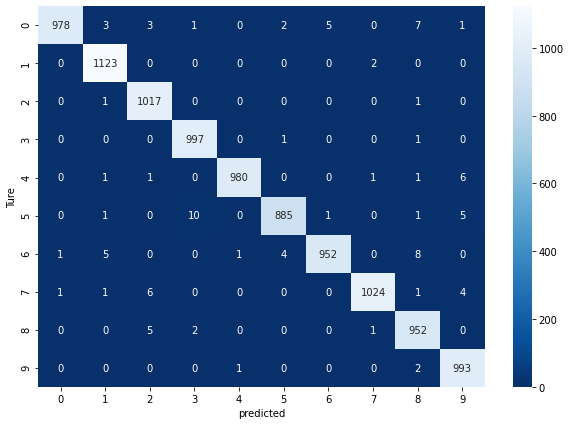

In [36]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d',cmap='Blues_r')
plt.xlabel('predicted')
plt.ylabel('Ture')
plt.title('MNIST with Alexnet')

In [37]:
# evaluate the model
train_acc = model.evaluate(X_train, Y_train)
test_acc = model.evaluate(X_test, Y_test)
print('Train:',train_acc,'Test:', test_acc)


313/313 [==============================] - 63s 201ms/step - loss: 0.0342 - accuracy: 0.9901
Train: [0.024327853694558144, 0.992900013923645] Test: [0.034212276339530945, 0.9901000261306763]


In [38]:
import matplotlib.pyplot as pyplot

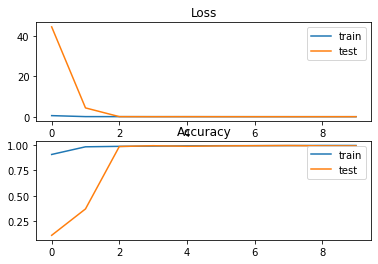

In [39]:
# plot loss during training
pyplot.subplot(2,1,1)
pyplot.title('Loss')
pyplot.plot(histt.history['loss'], label='train')
pyplot.plot(histt.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(2,1,2)
pyplot.title('Accuracy')
pyplot.plot(histt.history['accuracy'], label='train')
pyplot.plot(histt.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [40]:
from sklearn.metrics import classification_report

# predict 
pred = model.predict(X_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(Y_test, axis=1)

print(y_test.shape, pred.shape)
print(y_test[:5], pred[:5])

(10000,) (10000,)
[7 2 1 0 4] [7 2 1 0 4]


In [41]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.98      0.98       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

